In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')


In [162]:
## reading the data.. 
df = pd.read_csv('noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [163]:
df.tail(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775120e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


# Intro
The big question is to see 
wheather age or gender has to do anything with showing at the appoinment.
*** notes
and since the column name no show it clearly means 
No has showed.  

# Part 1 Exploring the data
Let's take an overall look to see the names of the columns, the shape, the data type ect..While we are doing that we are actiually planning our next step. Part 2

### let's explore our data in so many ways, to plan for our next step.


In [70]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

Looks like we have to fix some of the mispling columns like Handcap. This will be our first thing to do in part 2

In [72]:
# let's see the shape of our data
df.shape

(110527, 14)

In [73]:
# the number of the unique values for each column.
df.nunique()

PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [74]:
# let's check the data type of our dataset
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

By looking at the scheduledDay and AppointmentDay we can see that they need to be change to 
datatime type instaed of objects. 

In [75]:
# so far we know that some of the names columns have inccorect splings. Besides the one above.
# Now let's use the info function 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [76]:
## is there any missing values?
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

 GREAT we do not have any missing values in our dataset. 


In [59]:
# Is there any duplicets?
sum (df.duplicated())

0

THAT is VERY amazing, we do not have to deal with any duplicats


In [77]:
# Now let's use disecribe function to have further insights about our data.
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The minimum age is  "-1",  something isn't right. Age cannot be zere or less. 
This will be our third task to deal with in the second step.


## Part 2 cleaning the data 
our three main task will be as follow
1. Correct the misspling columns and remove any carachter and replace it with "_" if nasccery
2. Change the data type of the two columns scheduledDay and AppointmentDay to datatime.
3. Replace any values that are zero or less and the ages are more 100 in the age Column by the mean of Ages.
### Let's begin.. 


In [83]:
# 1. Correct the misspling columns and remove any carachter and replace it with "_" if nasccery
df.rename(columns={'Hipertension' : 'Hypertension','Handcap': 'Handicap', 'No-show':'No_show'}, inplace=True)

#let's check if that worked
df.head(0)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


In [37]:
# 2. Change the data type of the two columns scheduledDay and AppointmentDay to datatime.

df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])

# let's check
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS_received                    int64
No_show                        object
dtype: object

In [85]:
#3. Replace any values that are zero or less and the ages are more 100 
#in the age Column by the mean of Ages.

 
mean_Age = df['Age'].mean() 
df.loc[df.Age <= 0 ,  'Age'] = mean_Age


In [86]:
df.loc[df.Age >= 100 ,  'Age'] = mean_Age


# let's check 
df.Age.describe()

count    110527.000000
mean         38.269804
std          22.093756
min           1.000000
25%          20.000000
50%          37.088874
75%          55.000000
max          99.000000
Name: Age, dtype: float64

In [91]:
df.Age.head(10)

0    62.0
1    56.0
2    62.0
3     8.0
4    56.0
5    76.0
6    23.0
7    39.0
8    21.0
9    19.0
Name: Age, dtype: float64

Since our reaserch question is to see 
wheather age or gender has to do anything with showing at the appoinment. 
Well this is a bainry data so we need some classification methods, either Decesion tree or logistic regrssion 
to prdict that
but for the sake of this project we will only work on the discreptive side. 
So let's make some charts. 


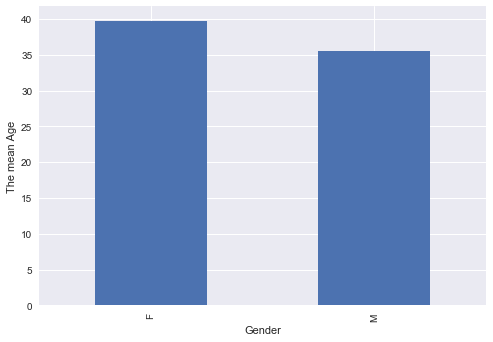

In [92]:
# this will give an idea about the avrage age of each gender in our dataset. 
df.groupby('Gender')['Age'].mean().plot.bar()
plt.ylabel('The mean Age');

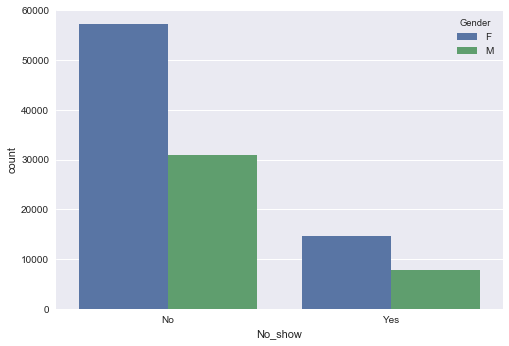

In [84]:
# Let's polt how many of each gender has showen
sns.countplot(x='No_show',hue='Gender',data=df)


###  by just looking at the chart above we can see that more than 50% of famale have missed the appoinment. But let's go deeper and look at the exact percentage. 

In [128]:
# let's create two differnt dataframe that show in percentage how many of each gender have 
# showin to an appoinment. 
df_famale_has_showin = df[(df.Gender == 'F') & ( df.No_show == 'No')]
total_famale = df[df.Gender == 'F']
the_percentage_of_famale = df_famale_has_showin.count() / total_famale.count() * 100 

# Let's do the same for the male
df_male_has_showin = df[(df.Gender == 'M') & ( df.No_show == 'No')]
total_male = df[df.Gender == 'M']
the_percentage_of_male = df_male_has_showin.count() / total_male.count() * 100 

# need to do the format thing.. 
print('The percentage of the female that has showin is: %','%.2f '% the_percentage_of_famale['Gender'])
print('The percentage of the male that has showin is: %','%.2f '% the_percentage_of_male['Gender'])



The percentage of the female that has showin is: % 79.69 
The percentage of the male that has showin is: % 80.03 


As you see there is no different between the two gender that have showin to
the appoinments. 

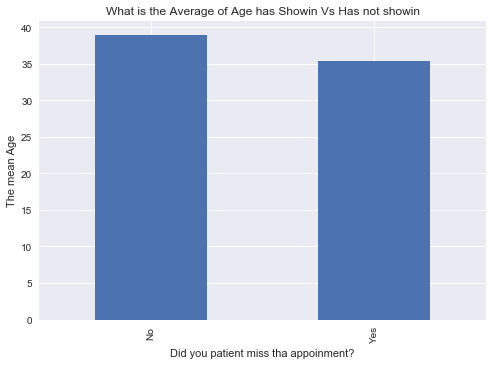

In [137]:
# plot_df(No_show['Age'], 'Age', 'Frequency', 'hist')
# No_show['Age'].describe()
# df.query('Age > 100').count()
df.groupby('No_show')['Age'].mean().plot.bar()
plt.title('What is the Average of Age has Showin Vs Has not showin')
plt.xlabel('Did you patient miss tha appoinment?')
plt.ylabel('The mean Age');



The average mean of age for people have showin to an appoinment is about 3 years. Let's dive in and
see what are the exact numbers. 

In [160]:
# let's create two differnt dataframe that show in percentage how many of each gender have 
# showin to an appoinment. 
df_average_age_has_showin = df[( df.No_show == 'No')]
df_average_age_hasnt_showin = df[( df.No_show == 'Yes')]

# Now let's get the mean.
average_age_shwoin =  df_average_age_has_showin.Age.mean()
average_age__not_shwoin = df_average_age_hasnt_showin.Age.mean()

# let's print the results. 

print('The Average age of the patients that has showin is:','%.2f '%average_age_shwoin ,'\n',
     'The percentage of the patients that has showin is: ' ,'%.2f '%average_age__not_shwoin
     )


 
 


The Average age of the patients that has showin is: 39.00  
 The percentage of the patients that has showin is:  35.37 


## Conclusion:

#### Gender has nothing to do with whether the patient showing the appoinment, Male at 80% and female at 79%
#### Age variable also isn't a predict whether a patient would miss an appoinment or not. Even though we saw a four year different in the average age between 

## Suggesting: 

#### Use a classification methods to identfiy which one of the variables can predict whether a patient will show to the appointment or not. 

## Resurces 

 stackoverflow http://bit.ly/replacethemean. <br>
Data school http://bit.ly/2KfO7FC